In [19]:
import seaborn as sns
from params import SidartheParamGenerator

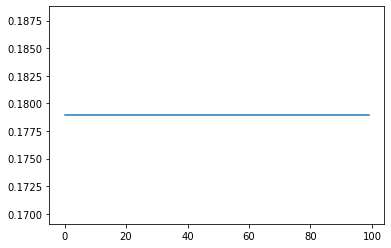

In [24]:
gen = SidartheParamGenerator()

gen.random_init(ranges="extended")
#gen.init_from_base_params("giordano")
gen.extend(100)
#gen.perturb(sigma=0.01)
params = gen.params

pl_x = range(0, len(params["alpha"]))

for key, param in params.items():
    if len(param) == 1:
        param = param * len(pl_x)

    if key == 'tau':
        sns.lineplot(pl_x, param)